# Checking for the Kaggle.json File


In [9]:
import os

# Verify the location of kaggle.json
file_path = r"C:\Users\PMLS\kaggle.json"
print("Does kaggle.json exist?", os.path.exists(file_path))


Does kaggle.json exist? True


# Setting up Kaggle APIs Access


In [10]:
import os
import shutil

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
shutil.move("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 600)


# Installing Kaggle Library

In [12]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Downloading Dataset

In [13]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0




  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:08<4:49:53, 126kB/s]
  0%|          | 2.00M/2.04G [00:11<3:02:51, 199kB/s]
  0%|          | 3.00M/2.04G [00:13<2:14:51, 270kB/s]
  0%|          | 4.00M/2.04G [00:16<1:54:58, 317kB/s]
  0%|          | 5.00M/2.04G [00:17<1:33:13, 390kB/s]
  0%|          | 6.00M/2.04G [00:19<1:20:01, 455kB/s]
  0%|          | 7.00M/2.04G [00:20<1:12:39, 501kB/s]
  0%|          | 8.00M/2.04G [00:21<57:44, 630kB/s]  
  0%|          | 9.00M/2.04G [00:23<57:27, 632kB/s]
  0%|          | 10.0M/2.04G [00:25<1:00:55, 596kB/s]
  1%|          | 11.0M/2.04G [00:26<49:57, 727kB/s]  
  1%|          | 12.0M/2.04G [00:27<54:18, 668kB/s]
  1%|          | 13.0M/2.04G [00:29<57:13, 634kB/s]
  1%|          | 14.0M/2.04G [00:31<55:30, 653kB/s]
  1%|          | 15.0M/2.04G [00:33<59:28, 609kB/s]
  1%|          | 16.0M/2.04G [00:35<1:07:07, 539kB/s]
  1%|          | 17.0M/2.04G [00:40<1:33:06, 389kB/s]
  1%|          | 18.0M/2.04G [00:43<1:41:01, 35

# Unzip the Downloaded Dataset

In [14]:
# Download the dataset from Kaggle
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

# Unzip the downloaded file
import zipfile
with zipfile.ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('plantvillage-dataset')


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# Checking Dataset is Extracted or not?

In [15]:
import zipfile
import os

# Make sure the file exists in your current directory
if os.path.exists("plantvillage-dataset.zip"):
    with zipfile.ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
        zip_ref.extractall("plantvillage-dataset")
    print("Dataset extracted successfully.")
else:
    print("Zip file not found.")


Dataset extracted successfully.


# Displaying First 3 Subdirectories and Files of the PlantVillage Dataset


In [16]:
import os

base_dir = "plantvillage-dataset"
for root, dirs, files in os.walk(base_dir):
    print(f"Directory: {root} | Subdirs: {dirs[:3]} | Files: {files[:3]}")
    break  # just printing top-level folder


Directory: plantvillage-dataset | Subdirs: ['plantvillage dataset'] | Files: []


# Installing Tensorflow Library

In [ ]:
!pip install tensorflow


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to your color images
data_dir = "plantvillage-dataset/plantvillage dataset/color"

# Set image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Create a data generator with basic normalization
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
    shuffle=True
)


Found 43456 images belonging to 38 classes.


In [17]:
inner_path = os.path.join("plantvillage-dataset", "plantvillage dataset")

for root, dirs, files in os.walk(inner_path):
    print(f"Directory: {root} | Subdirs: {dirs[:3]} | Files: {files[:3]}")
    break


Directory: plantvillage-dataset\plantvillage dataset | Subdirs: ['color', 'grayscale', 'segmented'] | Files: []


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset path
dataset_path = 'plantvillage-dataset/plantvillage dataset/color'

# Image size and batch size
img_width, img_height = 128, 128
batch_size = 32

# Preprocessing: rescale and split
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Training data generator
train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)


Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



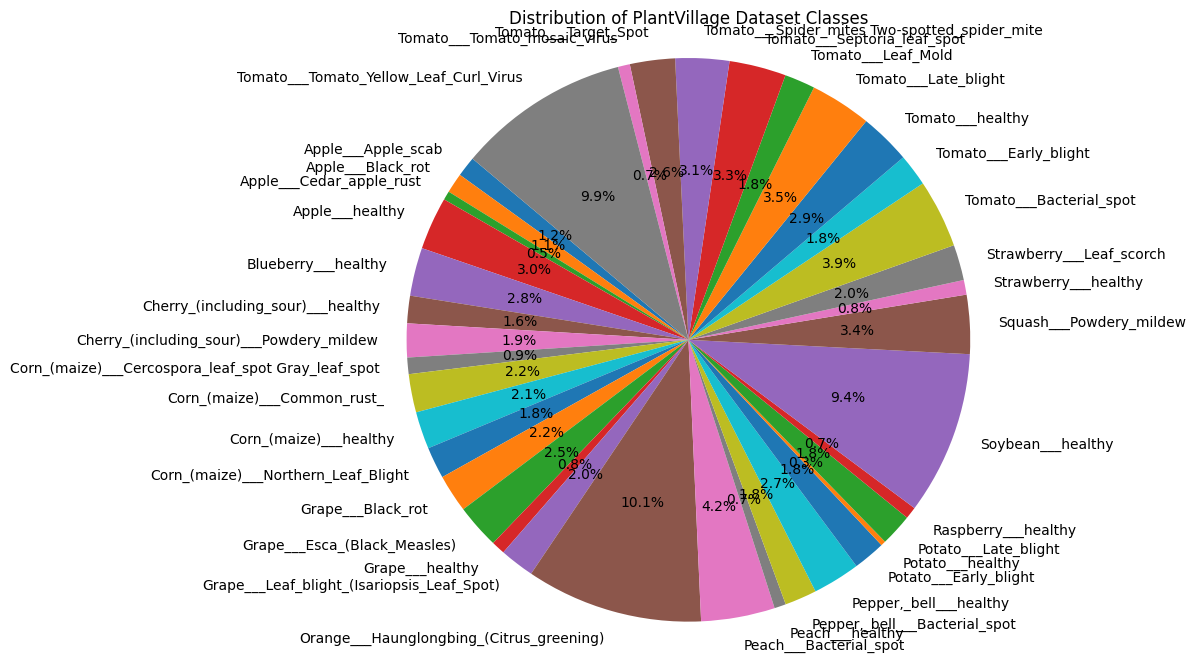

In [5]:
import os
import matplotlib.pyplot as plt

# Path to your dataset
dataset_path = 'plantvillage-dataset/plantvillage dataset/color'

# Get class names (folder names)
class_names = os.listdir(dataset_path)
class_counts = []

# Count number of images in each class
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        count = len(os.listdir(class_folder))
        class_counts.append(count)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_names, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of PlantVillage Dataset Classes')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()


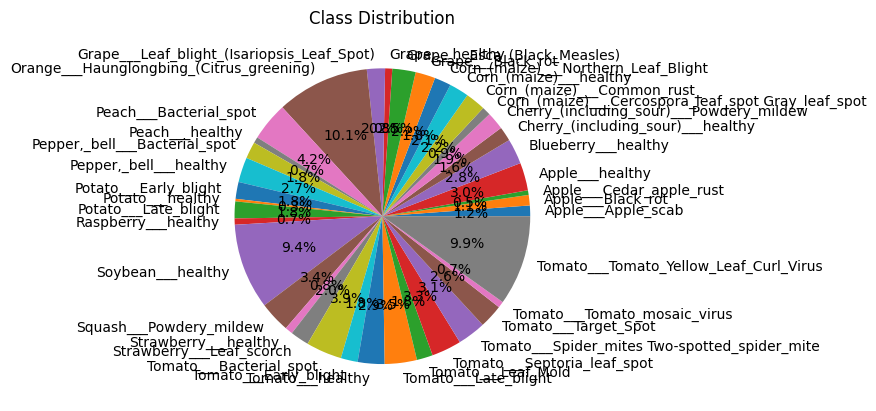

In [6]:
plt.pie([len(os.listdir(os.path.join('plantvillage-dataset/plantvillage dataset/color', c))) for c in os.listdir('plantvillage-dataset/plantvillage dataset/color')], labels=os.listdir('plantvillage-dataset/plantvillage dataset/color'), autopct='%1.1f%%'); plt.title('Class Distribution'); plt.show()


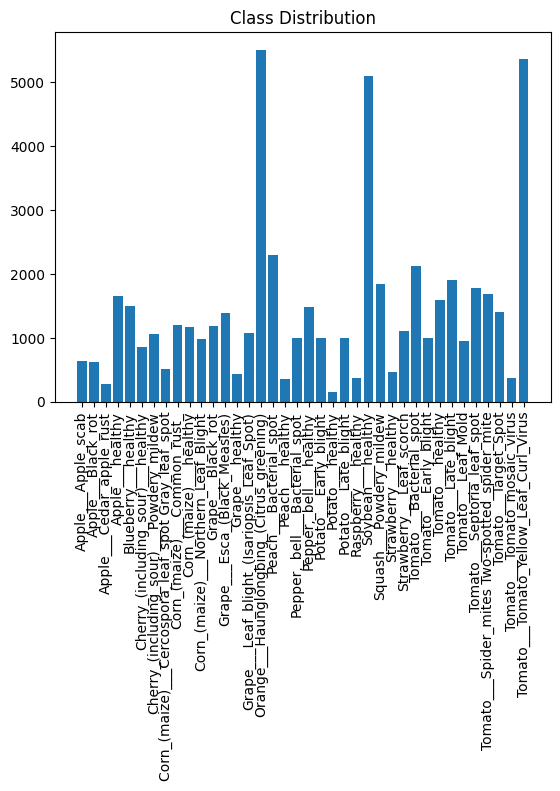

In [7]:
plt.bar(os.listdir('plantvillage-dataset/plantvillage dataset/color'), [len(os.listdir(os.path.join('plantvillage-dataset/plantvillage dataset/color', c))) for c in os.listdir('plantvillage-dataset/plantvillage dataset/color')]); plt.title('Class Distribution'); plt.xticks(rotation=90); plt.show()


In [10]:
import os

# Path to your dataset directory (replace with actual path)
dataset_path = 'plantvillage-dataset/plantvillage dataset/color'

# Get class names (folders in the directory)
class_names = os.listdir(dataset_path)

# Print class names and number of images per class
for class_name in class_names:
    class_folder = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_folder):
        count = len(os.listdir(class_folder))
        print(f"Class: {class_name}, Images: {count}")


Class: Apple___Apple_scab, Images: 630
Class: Apple___Black_rot, Images: 621
Class: Apple___Cedar_apple_rust, Images: 275
Class: Apple___healthy, Images: 1645
Class: Blueberry___healthy, Images: 1502
Class: Cherry_(including_sour)___healthy, Images: 854
Class: Cherry_(including_sour)___Powdery_mildew, Images: 1052
Class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot, Images: 513
Class: Corn_(maize)___Common_rust_, Images: 1192
Class: Corn_(maize)___healthy, Images: 1162
Class: Corn_(maize)___Northern_Leaf_Blight, Images: 985
Class: Grape___Black_rot, Images: 1180
Class: Grape___Esca_(Black_Measles), Images: 1383
Class: Grape___healthy, Images: 423
Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot), Images: 1076
Class: Orange___Haunglongbing_(Citrus_greening), Images: 5507
Class: Peach___Bacterial_spot, Images: 2297
Class: Peach___healthy, Images: 360
Class: Pepper,_bell___Bacterial_spot, Images: 997
Class: Pepper,_bell___healthy, Images: 1478
Class: Potato___Early_blight, Images: 1

In [17]:
import os

# Path to your dataset directory
dataset_path = 'plantvillage-dataset/plantvillage dataset/color'

# Count the number of folders (classes) and images (rows)
class_names = os.listdir(dataset_path)
num_classes = len(class_names)
num_images = sum([len(os.listdir(os.path.join(dataset_path, class_name))) for class_name in class_names])

print(f"Number of classes: {num_classes}")
print(f"Number of images: {num_images}")


Number of classes: 38
Number of images: 54305
